# MMDetection模型库预训练目标检测模型-预测单张图像

作者：同济子豪兄 2022-08-27

模型库：https://github.com/open-mmlab/mmdetection/blob/master/docs/en/model_zoo.md

## 进入 mmdetection 主目录

In [1]:
import os
os.chdir('mmdetection')

## 导入工具包

In [2]:
import torch
# 获取计算设备，有 GPU 就用 GPU，没有就用 CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('device', device)

device cuda:0


## 初始化目标检测模型

In [3]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

# config 配置文件
config_file = 'configs/yolox/yolox_x_8x8_300e_coco.py'
# checkpoint权重文件
checkpoint_file = 'https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_x_8x8_300e_coco/yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth'

# 初始化模型
model = init_detector(config_file, checkpoint_file, device=device)

load checkpoint from http path: https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_x_8x8_300e_coco/yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth


In [4]:
# 查看模型结构
for name, module in model.named_children():
    print('模型组件', name)
    for n,_ in  module.named_children():
        print('    ' + n)

模型组件 backbone
    stem
    stage1
    stage2
    stage3
    stage4
模型组件 neck
    upsample
    reduce_layers
    top_down_blocks
    downsamples
    bottom_up_blocks
    out_convs
模型组件 bbox_head
    loss_cls
    loss_bbox
    loss_obj
    loss_l1
    multi_level_cls_convs
    multi_level_reg_convs
    multi_level_conv_cls
    multi_level_conv_reg
    multi_level_conv_obj


## 载入测试图像

In [5]:
img_path = 'demo/demo.jpg'
# img_path = 'data/street_uk.jpeg'

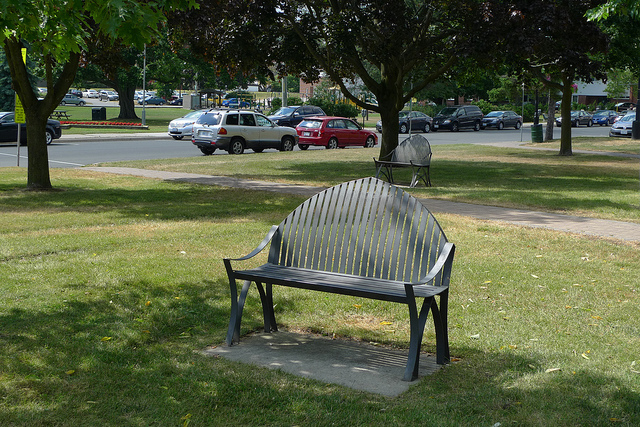

In [6]:
from PIL import Image
Image.open(img_path)

In [7]:
# 运行目标检测
result = inference_detector(model, img_path)

/environment/miniconda3/lib/python3.7/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


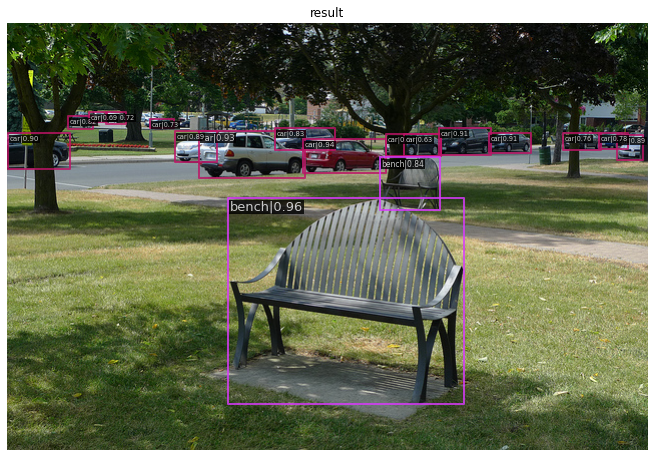

In [8]:
# 展示目标检测结果
show_result_pyplot(model, img_path, result, score_thr=0.6)

In [9]:
model.show_result(img_path, 
                  result,
                  score_thr=0.3,
                  bbox_color=(72, 101, 241),
                  text_color=(200, 200, 200),
                  thickness=2,
                  font_size=16,
                  show=True,
                  out_file='output/B_out.jpg')

## 解析预测结果

`result`包含了MS COCO目标检测数据集，八十个类别的预测框坐标和置信度信息。

预测框坐标：左上角X、左上角Y、右下角X、右下角Y

类别名称及对应的ID编号：https://blog.csdn.net/weixin_51697369/article/details/123210202

0 行人

1 自行车

2 汽车

3 摩托车

4 飞机

5 公共汽车

13 长椅

In [47]:
len(result)

80

In [21]:
# 13 bench 长椅 预测框
result[13]

array([[220.74973  , 175.72751  , 456.8132   , 381.46982  ,   0.9584287],
       [372.25848  , 134.65067  , 432.76538  , 187.73288  ,   0.8419647]],
      dtype=float32)

In [22]:
# 2 car 汽车 预测框
result[2].shape

(41, 5)